In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import datetime
import numpy as np
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

flights = pd.read_csv('flights.csv')

In [2]:
display(flights.sample(10))
display(flights.info())

,flight_id,actual_departure,departure_city,arrival_city,model,purchased_tickets,count_free_seats,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
112,136423,2017-01-10T10:12:00Z,Anapa,Moscow,Boeing 737-300,129,1,11,118,240422000.0,100.0,165740000.0,74682000.0
20,136861,2017-02-12T09:28:00Z,Anapa,Belgorod,Sukhoi Superjet-100,87,10,11,76,66842700.0,49.0,57457914.5,9384785.5
25,136754,2017-02-06T09:29:00Z,Anapa,Belgorod,Sukhoi Superjet-100,90,7,12,78,69956400.0,49.0,57457914.5,12498485.5
55,136781,2017-01-14T09:26:00Z,Anapa,Belgorod,Sukhoi Superjet-100,97,0,12,85,74234100.0,50.0,58630525.0,15603575.0
11,136936,2017-01-02T09:28:00Z,Anapa,Belgorod,Sukhoi Superjet-100,82,15,9,73,61342800.0,50.0,58630525.0,2712275.0
4,136922,2017-02-11T09:27:00Z,Anapa,Belgorod,Sukhoi Superjet-100,76,21,10,66,58956600.0,50.0,58630525.0,326075.0
2,136844,2017-02-28T09:26:00Z,Anapa,Belgorod,Sukhoi Superjet-100,79,18,6,73,55784700.0,50.0,58630525.0,-2845825.0
107,136463,2017-01-20T10:06:00Z,Anapa,Moscow,Boeing 737-300,122,8,12,110,232492000.0,99.0,164082600.0,68409400.0
18,136709,2017-01-15T09:28:00Z,Anapa,Belgorod,Sukhoi Superjet-100,87,10,11,76,66900900.0,50.0,58630525.0,8270375.0
77,136266,2017-02-27T10:08:00Z,Anapa,Moscow,Boeing 737-300,108,22,10,98,203632000.0,100.0,165740000.0,37892000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   actual_departure   118 non-null    object 
 2   departure_city     118 non-null    object 
 3   arrival_city       118 non-null    object 
 4   model              118 non-null    object 
 5   purchased_tickets  118 non-null    int64  
 6   count_free_seats   118 non-null    int64  
 7   business           118 non-null    int64  
 8   economy            118 non-null    int64  
 9   amount_tickets     118 non-null    float64
 10  minute_in_way      118 non-null    float64
 11  fuel_consumption   118 non-null    float64
 12  profit             118 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 12.1+ KB


None

В данном датасете есть информация по 118 рейсам, совершенным зимой 2017 года из Анапы. 8 числовых столбцов(не считая flight_id) и 4 строковых(1 из них дата вылета). Сразу же отредактируем формат даты, отбросим из неё информацию о времени.

In [3]:
flights.actual_departure = flights.actual_departure.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

Посмотрим общую статистику для числовых столбцов.

In [4]:
display(flights.describe())

,flight_id,purchased_tickets,count_free_seats,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
count,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02,1.180000e+02
mean,136533.440678,101.652542,11.847458,10.788136,90.864407,1.412236e+08,74.957627,1.120945e+08,2.912909e+07
std,261.971994,14.295643,9.865443,1.395057,14.028003,7.375326e+07,24.992783,5.360719e+07,2.319906e+07
min,136119.000000,64.000000,0.000000,6.000000,54.000000,5.150700e+07,49.000000,5.745791e+07,-7.123525e+06
25%,136286.250000,95.000000,1.000000,10.000000,83.000000,7.240080e+07,50.000000,5.863052e+07,1.377028e+07
50%,136528.500000,97.000000,10.000000,11.000000,85.500000,1.279870e+08,74.500000,1.111142e+08,1.647064e+07
75%,136768.500000,111.750000,20.000000,12.000000,101.750000,2.113605e+08,100.000000,1.657400e+08,4.717080e+07
max,136956.000000,130.000000,33.000000,12.000000,118.000000,2.451800e+08,103.000000,1.707122e+08,7.944000e+07


In [5]:
def statistics(column):
    graph=pd.DataFrame({'Рейсы до Москвы' : list(flights[column][flights.arrival_city=='Moscow']),
                           'Рейсы до Белгорода' : list(flights[column][flights.arrival_city=='Belgorod'])})
    graph.plot(kind='hist', bins=59, alpha = 0.7)
    print('Общая статистика:')
    display(flights[column].describe())
    print('Статистика рейсов до Москвы:')
    display(flights[column][flights.arrival_city=='Moscow'].describe())
    print('Статистика рейсов до Белгорода:')
    display(flights[column][flights.arrival_city=='Belgorod'].describe())
    

## Рассмотрим распределение признаков

Столбец flight_id является идентификатором рейса и не нуждается в анализе.
Целевой переменной является столбец profit, ра него мы и посмотрим в первую очередь. 

### Profit

<AxesSubplot:>

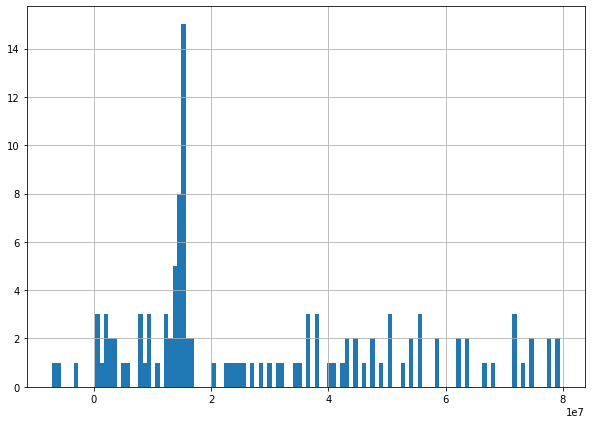

In [6]:
plt.rcParams['figure.figsize'] = (10,7)
flights['profit'].hist(bins=118)


По графику видно что 3 рейса имеют отрицательную прибыль, т.е терпят убытки.
Посмотрим что это за рейсы

In [7]:
display(flights[flights.profit<0])

,flight_id,actual_departure,departure_city,arrival_city,model,purchased_tickets,count_free_seats,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
0,136807,2017-02-23,Anapa,Belgorod,Sukhoi Superjet-100,68,29,8,60,51507000.0,50.0,58630525.0,-7123525.0
1,136642,2017-01-30,Anapa,Belgorod,Sukhoi Superjet-100,64,33,10,54,51507000.0,49.0,57457914.5,-5950914.5
2,136844,2017-02-28,Anapa,Belgorod,Sukhoi Superjet-100,79,18,6,73,55784700.0,50.0,58630525.0,-2845825.0


Рейсы, которые терпят убытки - это рейсы до Белгорода. Давайте посмотрим распределение этого признака с разделением по городам прибытия.

Общая статистика:


count    1.180000e+02
mean     2.912909e+07
std      2.319906e+07
min     -7.123525e+06
25%      1.377028e+07
50%      1.647064e+07
75%      4.717080e+07
max      7.944000e+07
Name: profit, dtype: float64

Статистика рейсов до Москвы:


count    5.900000e+01
mean     4.807583e+07
std      1.776850e+07
min      1.561660e+07
25%      3.571130e+07
50%      4.749260e+07
75%      6.190940e+07
max      7.944000e+07
Name: profit, dtype: float64

Статистика рейсов до Белгорода:


count    5.900000e+01
mean     1.018235e+07
std      6.294131e+06
min     -7.123525e+06
25%      5.516120e+06
50%      1.377028e+07
75%      1.499248e+07
max      1.677619e+07
Name: profit, dtype: float64

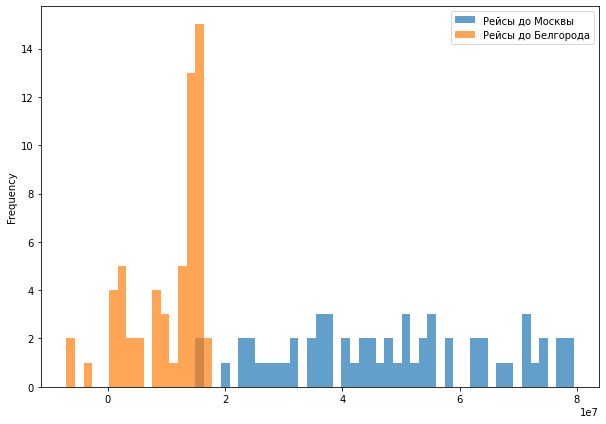

In [8]:

statistics('profit')

По графикy видно, что наибольшая выручка от рейсов в Москву. 

## Arrival_city и Model
Посмотрим как распределены города прибытия и модели самолетов. Нам известно, что каждый день из Анапы вылетает по 2 самолета: 1й - в Москву, 2й - в Белгород. Давайте посмотрим какие модели куда летают.

<AxesSubplot:xlabel='arrival_city', ylabel='count'>

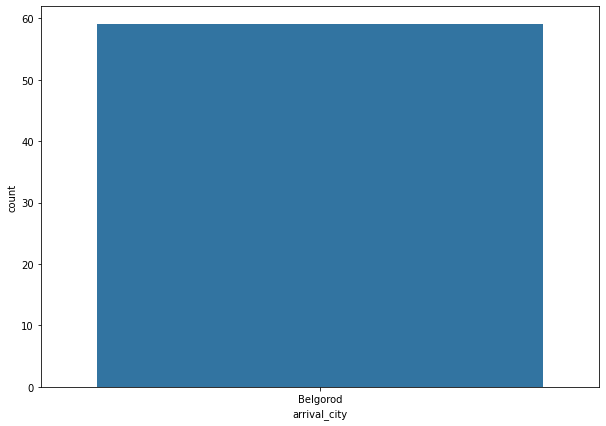

In [9]:
sns.countplot(flights.loc[:,'arrival_city'][flights.model == 'Sukhoi Superjet-100'])

<AxesSubplot:xlabel='arrival_city', ylabel='count'>

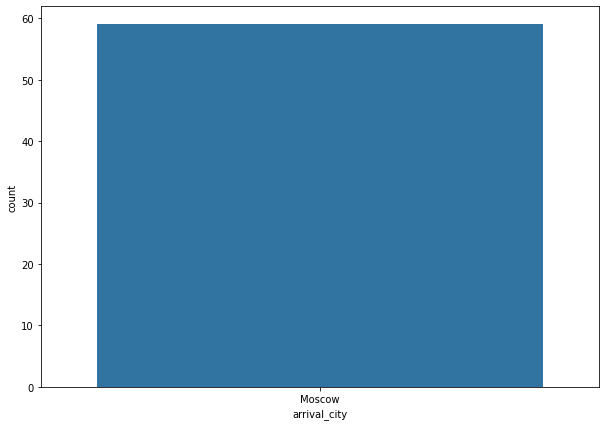

In [10]:
sns.countplot(flights.loc[:,'arrival_city'][flights.model == 'Boeing 737-300'])

Значит все самолеты модели Boeing 737-300 совершают рейсы в Москву, а модель Sukhoi Superjet-100 летает в Белгород. Давайте посмотрим как сильно различаются показатели прибыли по городам.

(array([0, 1]), [Text(0, 0, 'Belgorod'), Text(1, 0, 'Moscow')])

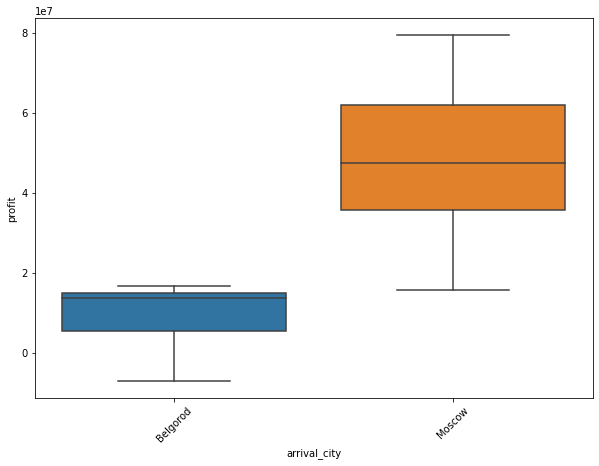

In [11]:
sns.boxplot(x='arrival_city', y='profit', 
               data = flights)
plt.xticks(rotation=45)

По графику видно, как сильно отличается прибыльность рейсов в Москву и Белгород.

## Purchased_tickets 
Так как максимальное количество мест в самолетах разное, лучше посмотрим на распределение этого признака как по каждому из самолетов, так и общее. Вместе с этим посмотрим, как часто самолет заполнялся менее чем на 75 процентов.

Общая статистика:


count    118.000000
mean     101.652542
std       14.295643
min       64.000000
25%       95.000000
50%       97.000000
75%      111.750000
max      130.000000
Name: purchased_tickets, dtype: float64

Статистика рейсов до Москвы:


count     59.000000
mean     113.118644
std        8.896115
min       97.000000
25%      107.000000
50%      112.000000
75%      120.000000
max      130.000000
Name: purchased_tickets, dtype: float64

Статистика рейсов до Белгорода:


count    59.000000
mean     90.186441
std       8.101670
min      64.000000
25%      86.500000
50%      95.000000
75%      97.000000
max      97.000000
Name: purchased_tickets, dtype: float64

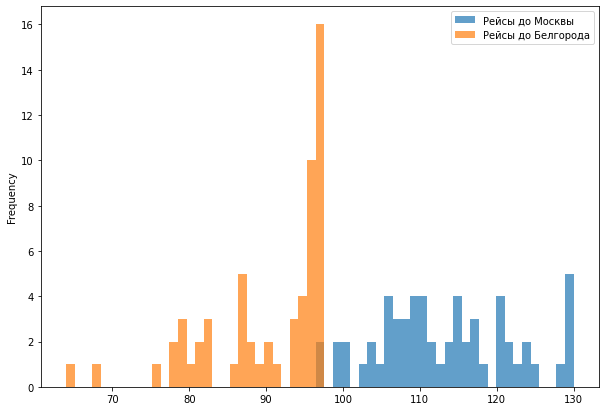

In [12]:

statistics('purchased_tickets')

In [13]:
print(f'Количество рейсов до Москвы, заполненных менее чем на 75%: {sum(flights.purchased_tickets[flights.arrival_city=="Moscow"] < int(130*0.75))}')
print(f'Количество рейсов до Белгорода, заполненных менее чем на 75%: {sum(flights.purchased_tickets[flights.arrival_city=="Belgorod"] < int(97*0.75))}')

Количество рейсов до Москвы, заполненных менее чем на 75%: 0
Количество рейсов до Белгорода, заполненных менее чем на 75%: 2


2 малозаполненных рейса на Белгород. Давайте посмотрим, входят ли эти 2 рейса в число убыточных.

In [14]:
display(flights[(flights['purchased_tickets'] < int(97*0.75)) & (flights['profit'] < 0)])


,flight_id,actual_departure,departure_city,arrival_city,model,purchased_tickets,count_free_seats,business,economy,amount_tickets,minute_in_way,fuel_consumption,profit
0,136807,2017-02-23,Anapa,Belgorod,Sukhoi Superjet-100,68,29,8,60,51507000.0,50.0,58630525.0,-7123525.0
1,136642,2017-01-30,Anapa,Belgorod,Sukhoi Superjet-100,64,33,10,54,51507000.0,49.0,57457914.5,-5950914.5


Да, 2 самых убыточных рейса являются также и самыми плохо заполненными. 

## count_free_seats
Посмотрим как часто в продаже остаются билеты на самолеты.

Общая статистика:


count    118.000000
mean      11.847458
std        9.865443
min        0.000000
25%        1.000000
50%       10.000000
75%       20.000000
max       33.000000
Name: count_free_seats, dtype: float64

Статистика рейсов до Москвы:


count    59.000000
mean     16.881356
std       8.896115
min       0.000000
25%      10.000000
50%      18.000000
75%      23.000000
max      33.000000
Name: count_free_seats, dtype: float64

Статистика рейсов до Белгорода:


count    59.000000
mean      6.813559
std       8.101670
min       0.000000
25%       0.000000
50%       2.000000
75%      10.500000
max      33.000000
Name: count_free_seats, dtype: float64

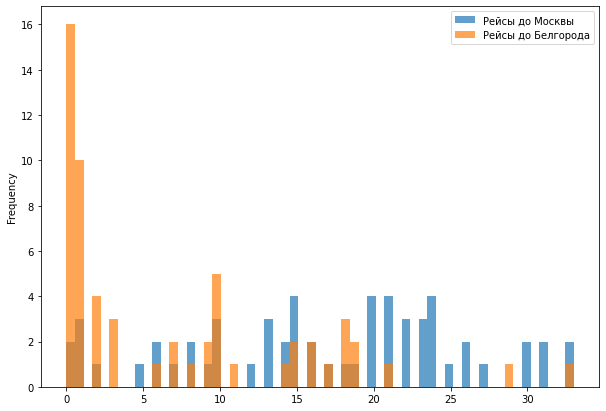

In [15]:
statistics('count_free_seats')

## Business and economy
Рассмотрим распределение этих 2х признаков

<AxesSubplot:xlabel='model', ylabel='economy'>

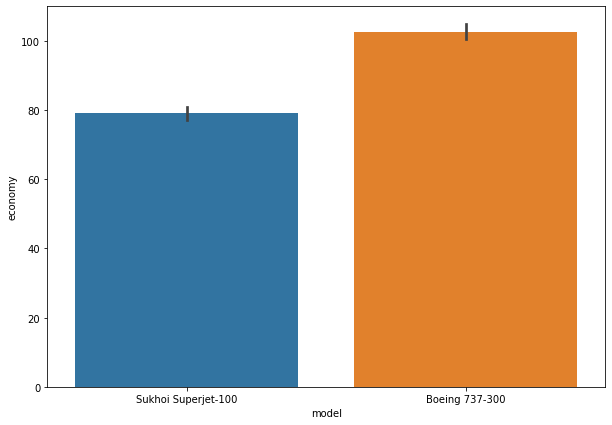

In [16]:
sns.barplot(x=flights.model, y = flights.economy)

<AxesSubplot:xlabel='model', ylabel='business'>

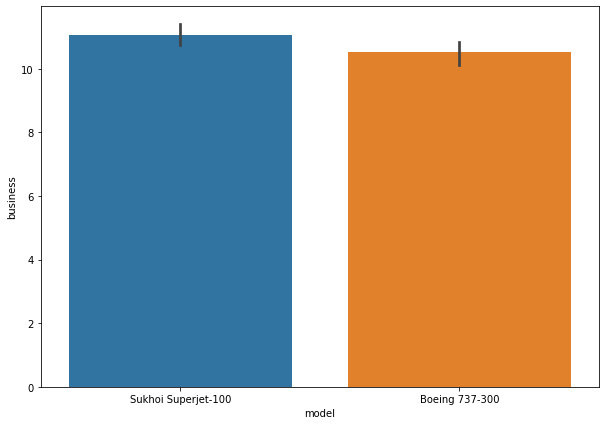

In [17]:
sns.barplot(x=flights.model, y = flights.business)

Давайте посмотрим, как сильно влияют на прибыль количество купленных билетов эконом и бизнес класса.

<AxesSubplot:xlabel='profit', ylabel='business'>

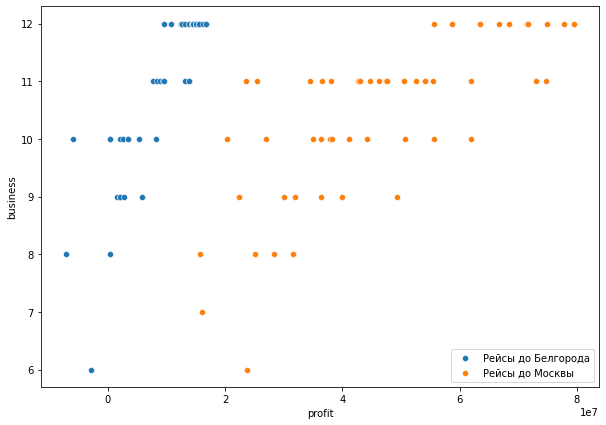

In [18]:
sns.scatterplot(data=flights[flights.arrival_city=='Belgorod'], x='profit', y='business', label = 'Рейсы до Белгорода' )
sns.scatterplot(data=flights[flights.arrival_city=='Moscow'], x='profit', y='business', label = 'Рейсы до Москвы')

<AxesSubplot:xlabel='profit', ylabel='economy'>

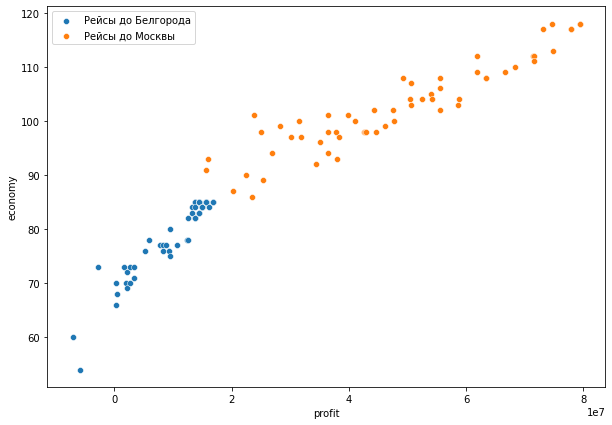

In [19]:
sns.scatterplot(data=flights[flights.arrival_city=='Belgorod'], x='profit', y='economy', label = 'Рейсы до Белгорода' )
sns.scatterplot(data=flights[flights.arrival_city=='Moscow'], x='profit', y='economy', label = 'Рейсы до Москвы')

По графикам четко видно, что основная прибыль в большинстве своем зависит от количества проданных билетов эконом класса, а зависимость количества проданных билетов бизнес класса сильнее выражена в рейсах до Белгорода. 

## Amount_tickets 
Теперь давайте посмотрим, как распределена общая стоимость билетов с разделением по городам.

Общая статистика:


count    1.180000e+02
mean     1.412236e+08
std      7.375326e+07
min      5.150700e+07
25%      7.240080e+07
50%      1.279870e+08
75%      2.113605e+08
max      2.451800e+08
Name: amount_tickets, dtype: float64

Статистика рейсов до Москвы:


count    5.900000e+01
mean     2.135349e+08
std      1.714422e+07
min      1.817400e+08
25%      2.006160e+08
50%      2.117180e+08
75%      2.259920e+08
max      2.451800e+08
Name: amount_tickets, dtype: float64

Статистика рейсов до Белгорода:


count    5.900000e+01
mean     6.891225e+07
std      6.386021e+06
min      5.150700e+07
25%      6.473295e+07
50%      7.240080e+07
75%      7.423410e+07
max      7.423410e+07
Name: amount_tickets, dtype: float64

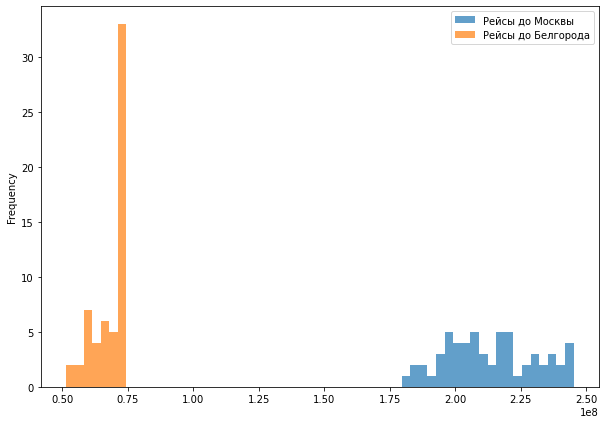

In [20]:
statistics('amount_tickets')

Достаточно большой разрыв в стоимости билетов между ~75млн и ~181 млн. Рейсы с общей стоимостью менее 75млн летят в Белгород, а стоимостью выше 180млн в Москву. Скорее всего это связано с тем, что расстояние до Москвы больше чем до Белгорода. Давайте в этом убедимся.

## Minute_in_way

Общая статистика:


count    118.000000
mean      74.957627
std       24.992783
min       49.000000
25%       50.000000
50%       74.500000
75%      100.000000
max      103.000000
Name: minute_in_way, dtype: float64

Статистика рейсов до Москвы:


count     59.000000
mean      99.830508
std        0.985280
min       98.000000
25%       99.000000
50%      100.000000
75%      100.000000
max      103.000000
Name: minute_in_way, dtype: float64

Статистика рейсов до Белгорода:


count    59.000000
mean     50.084746
std       0.650945
min      49.000000
25%      50.000000
50%      50.000000
75%      50.500000
max      51.000000
Name: minute_in_way, dtype: float64

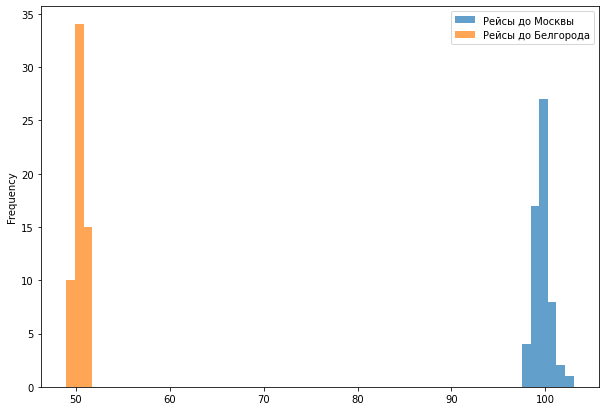

In [21]:
statistics('minute_in_way')

Среднее время в пути до Белгорода около 50 минут, тем временем до Москвы лететь в 2 раза дольше. 

## Fuel_consumption
Рассмотрим столбец расходов на топливо.

Общая статистика:


count    1.180000e+02
mean     1.120945e+08
std      5.360719e+07
min      5.745791e+07
25%      5.863052e+07
50%      1.111142e+08
75%      1.657400e+08
max      1.707122e+08
Name: fuel_consumption, dtype: float64

Статистика рейсов до Москвы:


count    5.900000e+01
mean     1.654591e+08
std      1.633004e+06
min      1.624252e+08
25%      1.640826e+08
50%      1.657400e+08
75%      1.657400e+08
max      1.707122e+08
Name: fuel_consumption, dtype: float64

Статистика рейсов до Белгорода:


count    5.900000e+01
mean     5.872990e+07
std      7.633044e+05
min      5.745791e+07
25%      5.863052e+07
50%      5.863052e+07
75%      5.921683e+07
max      5.980314e+07
Name: fuel_consumption, dtype: float64

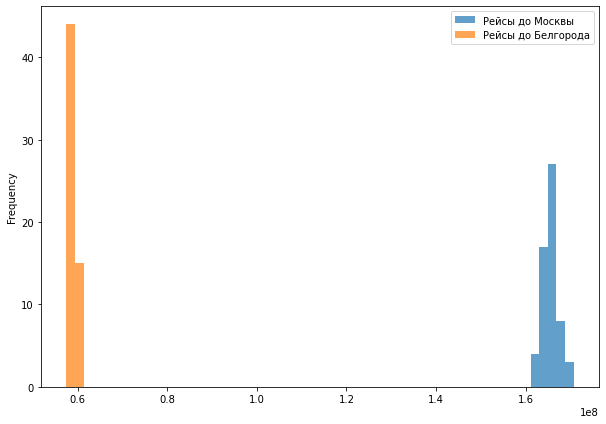

In [22]:
statistics('fuel_consumption')

<AxesSubplot:xlabel='model', ylabel='fuel_consumption'>

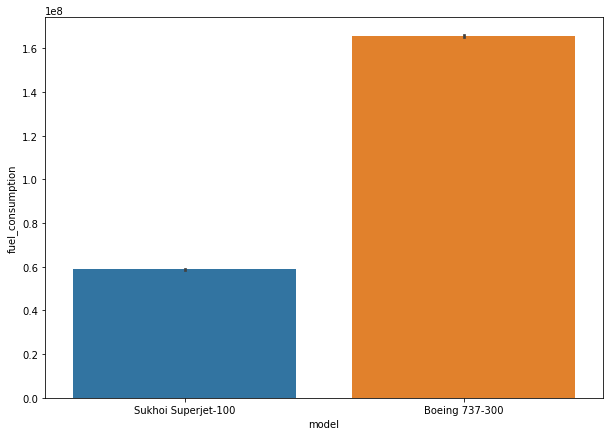

In [23]:
sns.barplot(x=flights.model, y = flights.fuel_consumption)

Расходы на топливо у Boeing значительно больше, чем у Sukhoi Superjet.

# Рекомендации: 

1. Расчет прибыли производился по простейшей формуле: сумма выкупленных билетов - расходы на топливо на рейс.
2. Рейсы, которые я предлагаю убрать и их предполагаемая прибыльность:

In [24]:
display(flights[['flight_id','profit']][flights['profit']<0])
print(f'При этом средняя прибыльность рейсов составляет: {round(np.mean(flights.profit))}')

,flight_id,profit
0,136807,-7123525.0
1,136642,-5950914.5
2,136844,-2845825.0


При этом средняя прибыльность рейсов составляет: 29129092


3.Большинство рейсов в Белгород не приносят большой прибыли. Поэтому можно подумать либо о полной смене направления, либо частичной(один день - самолет летит в Белгород, а на следующий - в другой город).
